In [ ]:
!nvidia-smi

Sun Dec 25 09:05:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/Jayms8462/tensorflow-helper-function/main/helper_functions.py

--2022-12-25 09:05:02--  https://raw.githubusercontent.com/Jayms8462/tensorflow-helper-function/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12271 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.98K  --.-KB/s    in 0s      

2022-12-25 09:05:02 (85.0 MB/s) - ‘helper_functions.py’ saved [12271/12271]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, check_tuneable, compare_historys


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2022-12-25 09:05:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 108.177.120.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   219MB/s    in 7.6s    

2022-12-25 09:05:14 (203 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/lobster_bisque'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hot_and_sour_soup'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/mussels'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/prime_rib'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/club_sandwich'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/huevos_rancheros'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/fish_and_chips'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tiramisu'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/miso_soup'.
There are 0 directories and 250 i

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name="data_augmentation")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5,
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)),
                                           callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 97s 348ms/step - loss: 3.3713 - accuracy: 0.2716 - val_loss: 2.4834 - val_accuracy: 0.4425
Epoch 2/5
237/237 [==============================] - 66s 277ms/step - loss: 2.1975 - accuracy: 0.4933 - val_loss: 2.0691 - val_accuracy: 0.5000
Epoch 3/5
237/237 [==============================] - 61s 254ms/step - loss: 1.8261 - accuracy: 0.5618 - val_loss: 1.9017 - val_accuracy: 0.5183
Epoch 4/5
237/237 [==============================] - 57s 238ms/step - loss: 1.6111 - accuracy: 0.6049 - val_loss: 1.7881 - val_accuracy: 0.5426
Epoch 5/5
237/237 [==============================] - 51s 213ms/step - loss: 1.4473 - accuracy: 0.6415 - val_loss: 1.7898 - val_accuracy: 0.5320


In [ ]:
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 60s 76ms/step - loss: 1.5922 - accuracy: 0.5813


[1.5922439098358154, 0.5812672972679138]

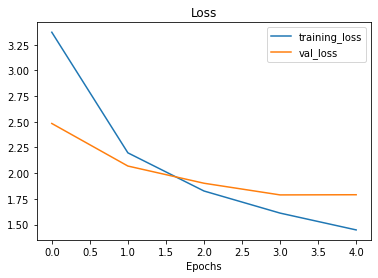

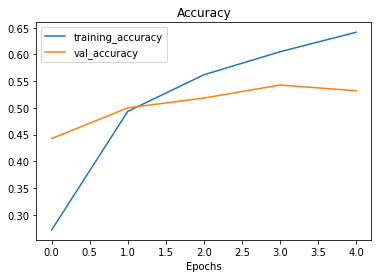

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
from tensorflow.python import test
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 61s 227ms/step - loss: 1.2216 - accuracy: 0.6821 - val_loss: 1.7506 - val_accuracy: 0.5397
Epoch 6/10
237/237 [==============================] - 49s 204ms/step - loss: 1.0808 - accuracy: 0.7093 - val_loss: 1.7446 - val_accuracy: 0.5410
Epoch 7/10
237/237 [==============================] - 51s 212ms/step - loss: 1.0153 - accuracy: 0.7325 - val_loss: 1.7182 - val_accuracy: 0.5477
Epoch 8/10
237/237 [==============================] - 46s 191ms/step - loss: 0.9527 - accuracy: 0.7493 - val_loss: 1.7795 - val_accuracy: 0.5381
Epoch 9/10
237/237 [==============================] - 45s 188ms/step - loss: 0.8838 - accuracy: 0.7649 - val_loss: 1.7128 - val_accuracy: 0.5546
Epoch 10/10
237/237 [==============================] - 44s 184ms/step - loss: 0.8249 - accuracy: 0.7778 - val_loss: 1.7236 - val_accuracy: 0.5516


In [ ]:
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 59s 74ms/step - loss: 1.4985 - accuracy: 0.6028


[1.498503565788269, 0.602811872959137]

5
11
[0.2715511620044708, 0.4933333396911621, 0.5618481636047363, 0.6048845052719116, 0.6414521336555481, 0.6821122169494629, 0.7093069553375244, 0.7325412631034851, 0.7493069171905518, 0.7648844718933105, 0.7778217792510986]


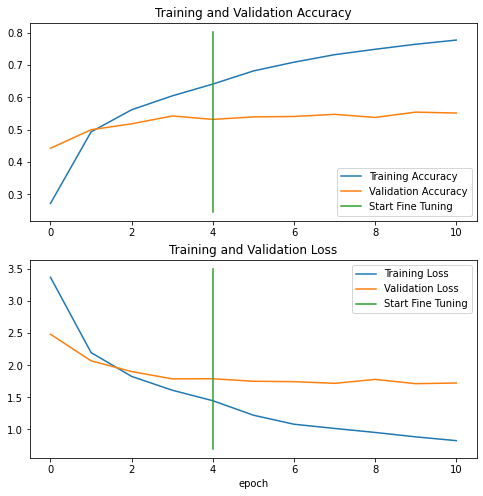

In [ ]:
compare_historys(original_history=history_all_classes_10_percent,
                new_history=history_all_classes_10_percent_fine_tune,
                initial_epochs=5)

In [ ]:
model.save("drive/My Drive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model")

In [ ]:
model = tf.keras.models.load_model("drive/My Drive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model")

In [ ]:
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 61s 75ms/step - loss: 1.4985 - accuracy: 0.6028


(1.498503565788269, 0.602811872959137)

In [ ]:
results_all_classes_10_percent_fine_tune

[1.498503565788269, 0.602811872959137]

In [ ]:
pred_prods = model.predict(test_data, verbose=1)

790/790 [==============================] - 65s 81ms/step


In [ ]:
len(pred_prods)

25250

In [ ]:
pred_prods.shape

(25250, 101)

In [ ]:
pred_prods[:10]

array([[2.76588500e-01, 1.02224396e-04, 7.50223175e-02, ...,
        2.03817181e-05, 2.11756001e-03, 6.95538074e-02],
       [8.69213998e-01, 2.51266012e-08, 9.71656002e-04, ...,
        1.41269453e-02, 6.90199158e-07, 7.98154088e-06],
       [5.40898681e-01, 1.18310191e-02, 5.78532368e-03, ...,
        8.42857291e-04, 1.97619782e-04, 3.15611716e-03],
       ...,
       [1.30485311e-01, 1.04463561e-05, 8.37656204e-04, ...,
        1.65757075e-01, 8.64866714e-04, 1.19215605e-04],
       [4.20490026e-01, 2.70579971e-04, 1.91761494e-01, ...,
        3.92212736e-04, 2.29571975e-04, 5.01021161e-04],
       [6.10574126e-01, 5.08500250e-07, 1.17225631e-03, ...,
        2.03424692e-02, 5.06680863e-06, 2.43645115e-03]], dtype=float32)

In [ ]:
pred_classes = pred_prods.argmax(axis=1)

In [ ]:
pred_classes[:10]

array([ 0,  0,  0,  8,  8, 78, 29, 46,  0,  0])

In [ ]:
class_names = test_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

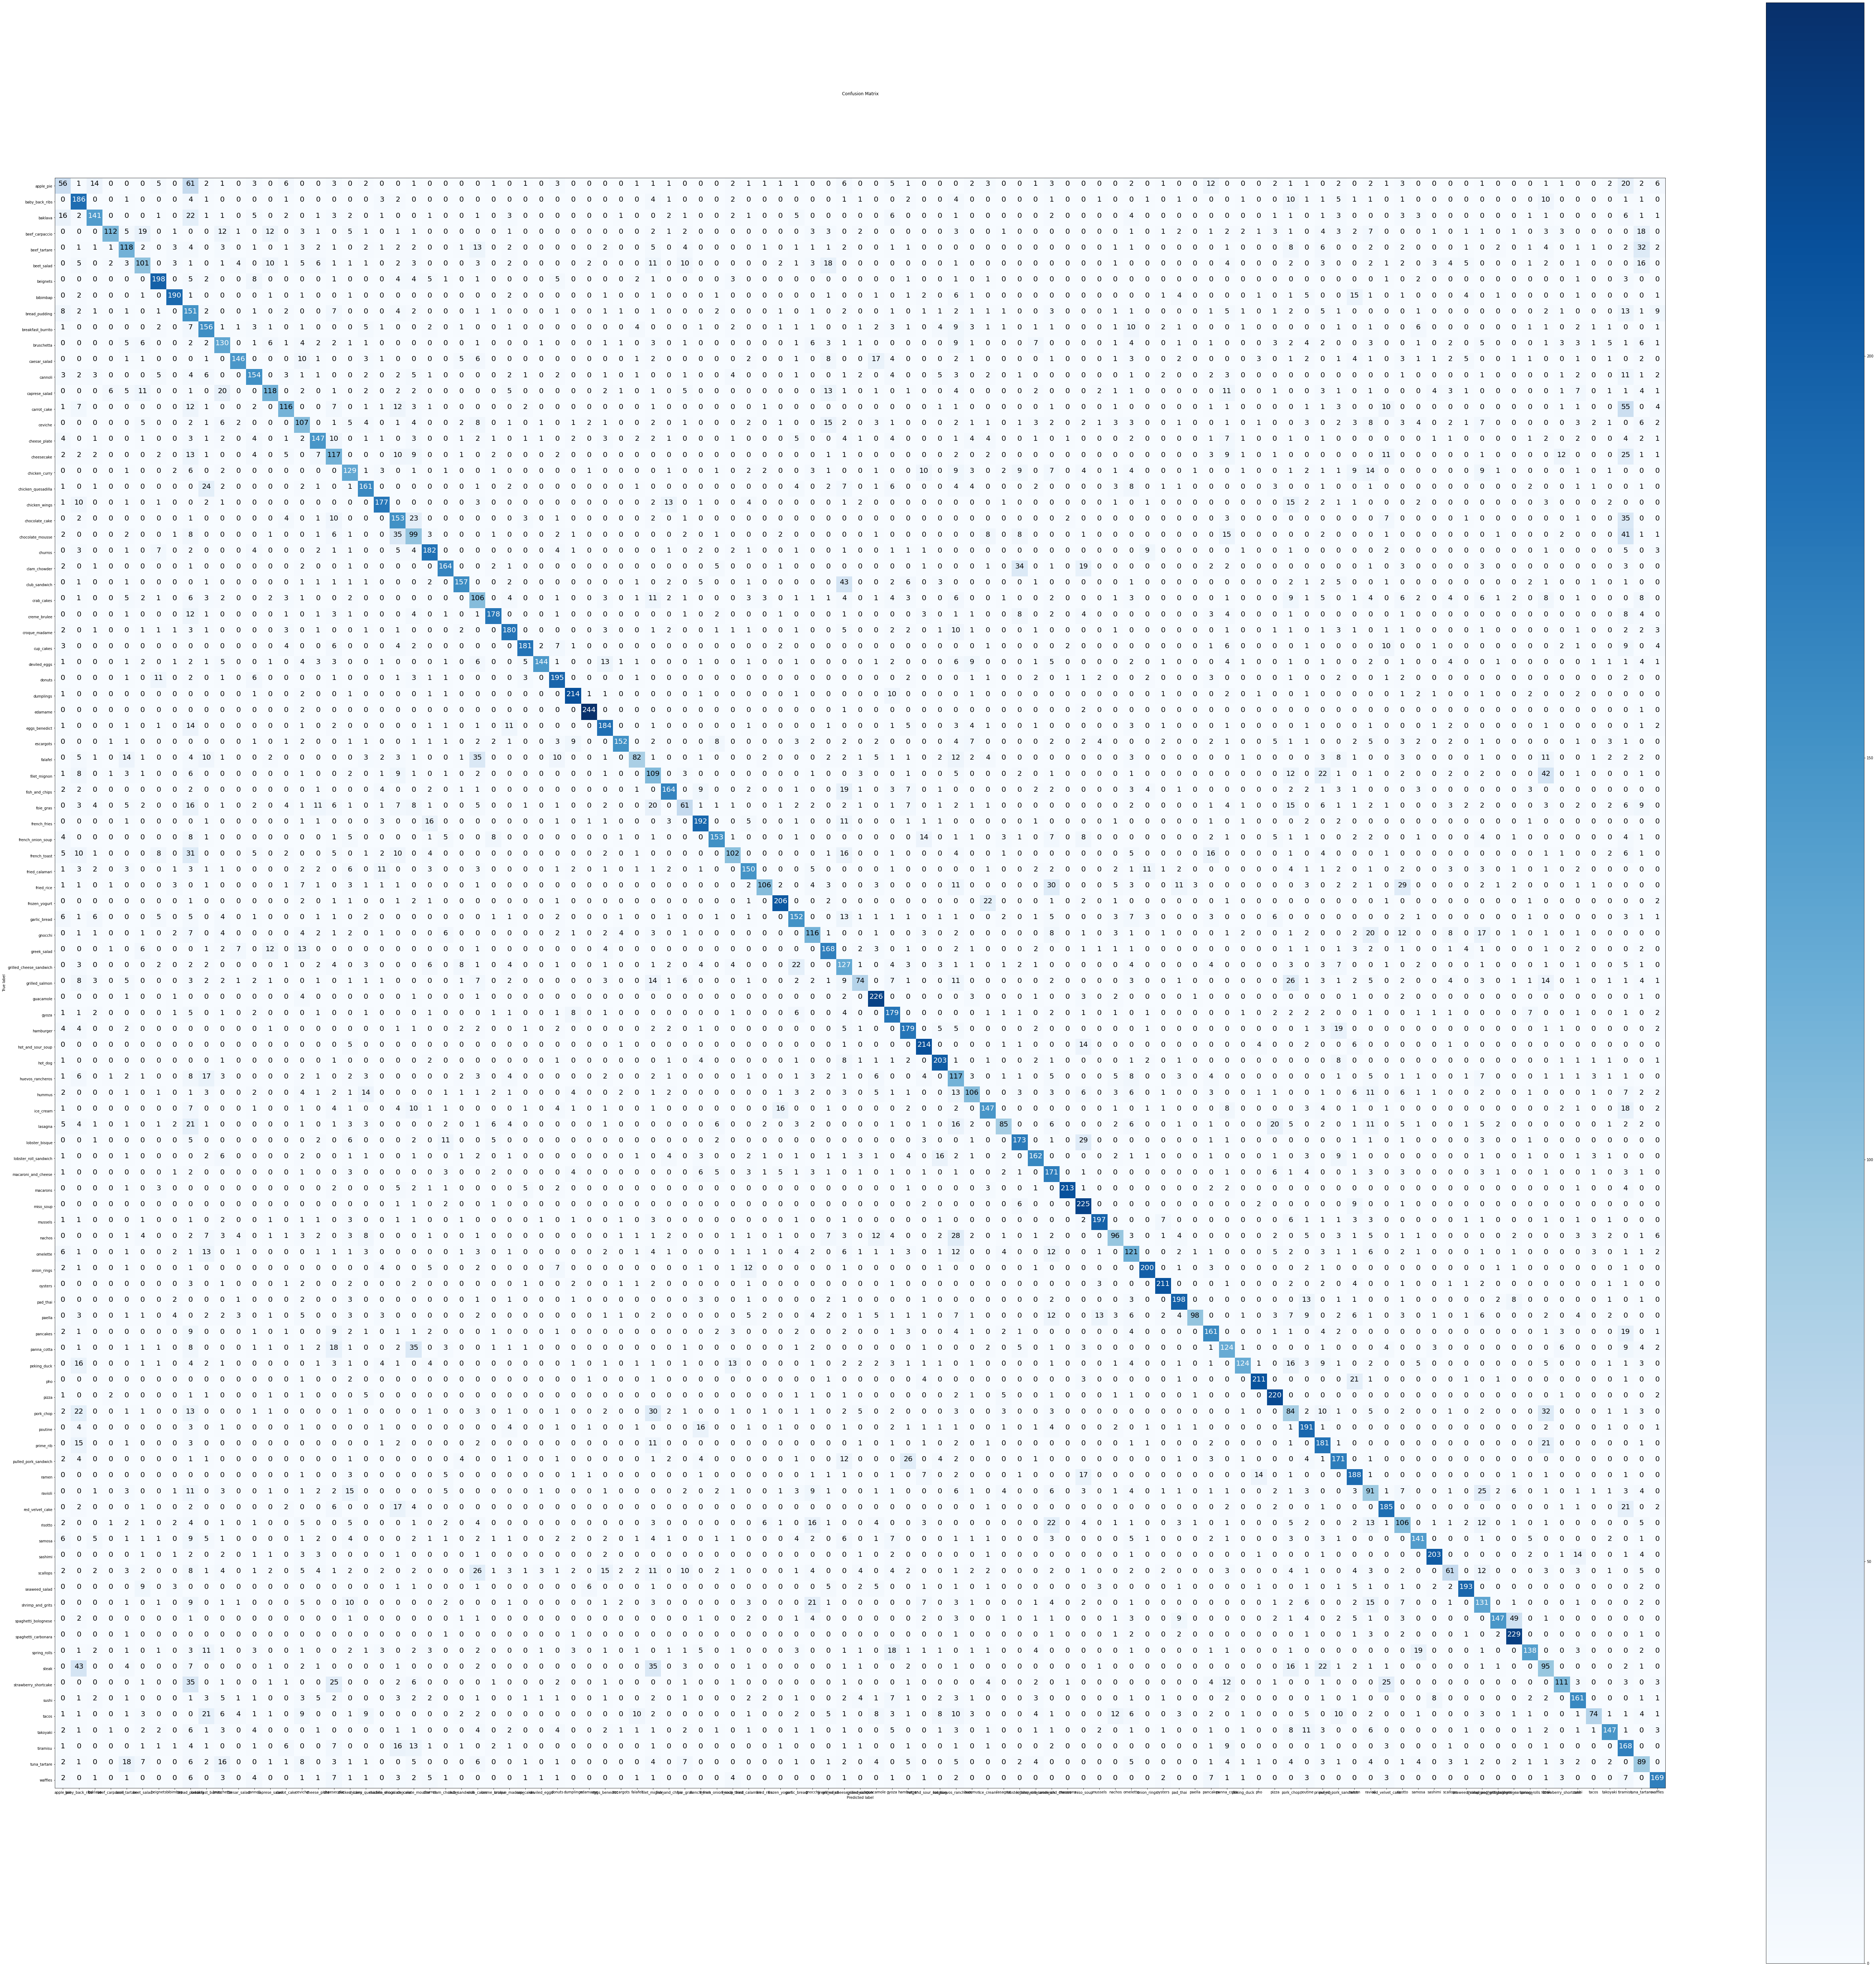

In [ ]:
from helper_functions import make_confusion_matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       250
           1       0.46      0.74      0.57       250
           2       0.70      0.56      0.63       250
           3       0.86      0.45      0.59       250
           4       0.49      0.47      0.48       250
           5       0.50      0.40      0.45       250
           6       0.75      0.79      0.77       250
           7       0.83      0.76      0.79       250
           8       0.23      0.60      0.34       250
           9       0.48      0.62      0.54       250
          10       0.48      0.52      0.50       250
          11       0.82      0.58      0.68       250
          12       0.66      0.62      0.64       250
          13       0.65      0.47      0.55       250
          14       0.66      0.46      0.54       250
          15       0.41      0.43      0.42       250
          16       0.63      0.59      0.61       250
          17       0.39    